## Weather Analysis
In general the expected results should show that cities closer to the equator have a higher relative temperature and humidity than those further away. The analysis of random cities selected seeks to prove or disprove the hypothesis that cities closer to the equator have a higher temperature.

Results: Latitude and Longitude 0 degrees where the equator crosses the Prime Meridian shows that some of the highest temperatures are found not at this point. The average temperature ranges from 60 degrees to 90 degrees Farenheit. With regions having higher temperatures above and below the 0 lat/lng point. The theory that the equator has the warmest temperature is disproven. However some of the worlds warmest temperatures occur not very far east or west of that point.
Cloudiness varies and windspeeds are relatively low. To add relative humidity percentages ranges from 42 to 100%. This is not surprising given the warm temperatures in this region.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

# Google API Key
from config import gkey

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [45]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to your cities list
    if city not in cities:
        cities.append(city)        
        
# Print the city count to confirm sufficient count
len(cities)

614

In [48]:
#Create a Dataframe with list of cities
cities_df = pd.DataFrame(cities)
cities_df["City Name"] = ""

for index, row in cities_df.iterrows():
    row["City Name"] = cities_df.loc[index,0]
    
cities_df.set_index("City Name")
cities_df= cities_df.drop(0, axis=1)
cities_df.head()

,City Name
0,punta arenas
1,lagoa
2,albany
3,queanbeyan
4,hermanus


In [49]:
#Additional columns to add to DataFrame
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Temperature (F)"] = ""
cities_df["Humidity (%)"] = ""
cities_df["Cloudiness"] = ""
cities_df["Windspeed (mph)"] = ""
# cities_df= cities_df.drop(0, axis=1)
cities_df.head()

,City Name,Lat,Lng,Temperature (F),Humidity (%),Cloudiness,Windspeed (mph)
0,punta arenas,,,,,,
1,lagoa,,,,,,
2,albany,,,,,,
3,queanbeyan,,,,,,
4,hermanus,,,,,,


## Perform API Calls

In [51]:
# OpenWeatherMap API Key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Temperature (F)": city_max_temp,
                          "Humidity (%)": city_humidity,
                          "Cloudiness": city_clouds,
                          "Windspeed (mph)": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | lagoa
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | queanbeyan
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | tetiyiv
Processing Record 7 of Set 1 | bandundu
Processing Record 8 of Set 1 | kemi
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | narsaq
Processing Record 11 of Set 1 | paamiut
Processing Record 12 of Set 1 | kahului
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | zaltan
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 1 | umm lajj
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | taln

Processing Record 34 of Set 4 | opuwo
Processing Record 35 of Set 4 | vila franca do campo
Processing Record 36 of Set 4 | esperance
Processing Record 37 of Set 4 | shingu
Processing Record 38 of Set 4 | ucluelet
Processing Record 39 of Set 4 | chapada dos guimaraes
Processing Record 40 of Set 4 | mapiripan
Processing Record 41 of Set 4 | viedma
Processing Record 42 of Set 4 | ixtapa
Processing Record 43 of Set 4 | santo tomas
Processing Record 44 of Set 4 | welkom
Processing Record 45 of Set 4 | ampanihy
Processing Record 46 of Set 4 | ballina
Processing Record 47 of Set 4 | alice springs
Processing Record 48 of Set 4 | vila velha
Processing Record 49 of Set 4 | asfi
City not found. Skipping...
Processing Record 0 of Set 5 | birao
Processing Record 1 of Set 5 | kochi
Processing Record 2 of Set 5 | palmer
Processing Record 3 of Set 5 | new norfolk
Processing Record 4 of Set 5 | huarmey
Processing Record 5 of Set 5 | jiwani
Processing Record 6 of Set 5 | port lincoln
Processing Record 7

Processing Record 21 of Set 8 | wajir
Processing Record 22 of Set 8 | surbo
Processing Record 23 of Set 8 | padang
Processing Record 24 of Set 8 | sao felix do xingu
Processing Record 25 of Set 8 | koson
Processing Record 26 of Set 8 | becicherecu mic
Processing Record 27 of Set 8 | mujiayingzi
Processing Record 28 of Set 8 | maues
Processing Record 29 of Set 8 | dmitriyevka
Processing Record 30 of Set 8 | san borja
Processing Record 31 of Set 8 | pangnirtung
Processing Record 32 of Set 8 | kuopio
Processing Record 33 of Set 8 | emerald
Processing Record 34 of Set 8 | kayerkan
Processing Record 35 of Set 8 | touros
Processing Record 36 of Set 8 | saint-joseph
Processing Record 37 of Set 8 | acapulco
Processing Record 38 of Set 8 | namibe
Processing Record 39 of Set 8 | kjollefjord
Processing Record 40 of Set 8 | beaverlodge
Processing Record 41 of Set 8 | berdigestyakh
Processing Record 42 of Set 8 | cairns
Processing Record 43 of Set 8 | acajutla
Processing Record 44 of Set 8 | zemio


Processing Record 8 of Set 12 | hohhot
Processing Record 9 of Set 12 | catuday
Processing Record 10 of Set 12 | tromso
Processing Record 11 of Set 12 | indramayu
Processing Record 12 of Set 12 | zhigalovo
Processing Record 13 of Set 12 | brookings
Processing Record 14 of Set 12 | carutapera
Processing Record 15 of Set 12 | celestun
Processing Record 16 of Set 12 | alofi
Processing Record 17 of Set 12 | taoudenni
Processing Record 18 of Set 12 | huajuapan
City not found. Skipping...
Processing Record 19 of Set 12 | orlik
Processing Record 20 of Set 12 | shimoda
Processing Record 21 of Set 12 | smithers
Processing Record 22 of Set 12 | richard toll
City not found. Skipping...
Processing Record 23 of Set 12 | popova
Processing Record 24 of Set 12 | isabela
Processing Record 25 of Set 12 | kasongo
Processing Record 26 of Set 12 | katangli
Processing Record 27 of Set 12 | mercedes
Processing Record 28 of Set 12 | fare
Processing Record 29 of Set 12 | san jose
Processing Record 30 of Set 12 

In [54]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Temperature (F)"]
humidity = city_data_pd["Humidity (%)"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Windspeed (mph)"]

# Export the City_Data into a csv
city_data_pd.to_csv("Output_Data/weather_results.csv", index_label="City_ID")

# Show Record Count
city_data_pd.count()

City               551
Cloudiness         551
Country            551
Date               551
Humidity (%)       551
Lat                551
Lng                551
Temperature (F)    551
Windspeed (mph)    551
dtype: int64

In [55]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity (%),Lat,Lng,Temperature (F),Windspeed (mph)
0,punta arenas,75,CL,1540760400,66,-53.16,-70.91,51.80,9.17
1,lagoa,0,PT,1540760400,54,37.14,-8.45,53.60,9.17
2,albany,90,US,1540761120,70,42.65,-73.75,48.20,4.70
3,queanbeyan,90,AU,1540760400,71,-35.35,149.23,51.80,9.17
4,hermanus,56,ZA,1540762336,64,-34.42,19.24,67.05,2.82


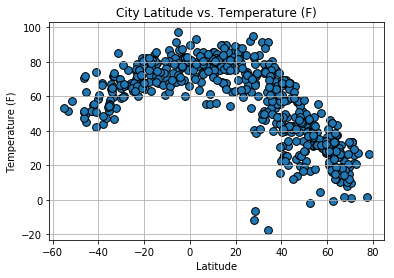

In [56]:
#Latitude vs. Temperature
#axes values
x_axis = city_data_pd['Lat']
y_axis = city_data_pd['Temperature (F)']
plt.scatter(x_axis, y_axis, s=60, linewidths=1, edgecolors='black')

#Chart labels
plt.title("City Latitude vs. Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

plt.savefig("Output_Data/Latitude_Temperature (F).png")
plt.show()


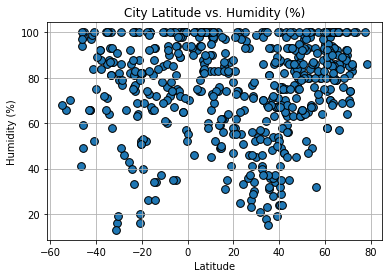

In [57]:
#Latitude vs. Humidity (%)
#axes values
x_axis = city_data_pd['Lat']
y_axis = city_data_pd['Humidity (%)']
plt.scatter(x_axis, y_axis, s=60, linewidths=1, edgecolors='black')

#Chart labels
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("Output_Data/Latitude_Humidity (%).png")
plt.show()


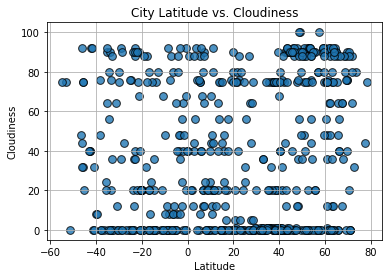

In [58]:
#Latitude vs. Cloudiness
#axes values
x_axis = city_data_pd['Lat']
y_axis = city_data_pd['Cloudiness']
plt.scatter(x_axis, y_axis, s=60, alpha=0.8, linewidths=1, edgecolors='black')

#Chart labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

plt.savefig("Output_Data/Latitude_Cloudiness.png")
plt.show()


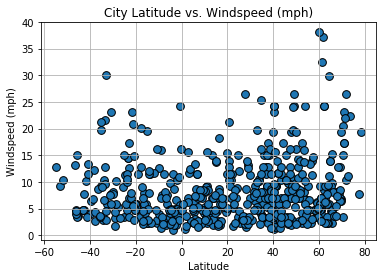

In [59]:
#Latitude vs. Windspeed (mph)
#axes values
x_axis = city_data_pd['Lat']
y_axis = city_data_pd['Windspeed (mph)']
plt.scatter(x_axis, y_axis, s=60, linewidths=1, edgecolors='black')

#Chart labels
plt.title("City Latitude vs. Windspeed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.grid(True)

plt.savefig("Output_Data/Latitude_Winspeed.png")
plt.show()